In [2]:
'''
Basic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

'\nBasic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py\n\nTrains a simple deep NN on the MNIST dataset.\n\nGets to 98.40% test accuracy after 20 epochs\n(there is *a lot* of margin for parameter tuning).\n2 seconds per epoch on a K520 GPU.\n'

# FeedForward Network

In [3]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'Total train samples')
print(x_test.shape[0], 'Total test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 Total train samples
10000 Total test samples


## Test Models

In [5]:
def test_model(sample_count):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
#     model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

#     random_indeces = np.arange(len(x_train))
#     np.random.shuffle(random_indeces)
#     x_train = x[random_indeces]
#     y_train = y[random_indeces]

    x_train_small = x_train[:][:sample_count]
    y_train_small = y_train[:][:sample_count]
    print('Training Shape:', x_train_small.shape)

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    training = model.fit(x_train_small, y_train_small,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))


    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    training.history['acc'] = 100.0 * np.array(training.history['acc']) # Convert to percent
    training.history['val_acc'] = 100.0 * np.array(training.history['val_acc']) # Convert to percent
    
    # Start the accuracy at 10% before training started
    training.history['acc'] = np.insert(training.history['acc'], 0, 10.0)
    training.history['val_acc'] = np.insert(training.history['val_acc'], 0, 10.0)
    
    return training

In [6]:
log10_histories = [test_model(6), test_model(60), test_model(600), test_model(6000), test_model(60000)]
linear_histories_low = [test_model(100), test_model(200), test_model(300), test_model(400), test_model(500)]
linear_histories_high = [test_model(50100), test_model(50200), test_model(50300), test_model(50400), test_model(50500)]

log10_histories = [training.history for training in log10_histories]
linear_histories_low = [training.history for training in linear_histories_low]
linear_histories_high = [training.history for training in linear_histories_high]

Training Shape: (6, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 6 samples, validate on 10000 samples
Epoch 1/20
6/6 [==============================] - 1s 103ms/step - loss: 2.3262 - acc: 0.0000e+00 - val_loss: 2.3572 - val_acc: 0.2980
Epoch 2/20
6/6 [==============================] - 0s 55ms/step - loss: 0.6134 - acc: 1.0000 - val_loss: 2.4874 - val_acc: 0.3311
Epoch 3/20
6/6 [==============================] - 0s 54ms/step - l

600/600 [==============================] - 0s 606us/step - loss: 0.2754 - acc: 0.9300 - val_loss: 0.6351 - val_acc: 0.8018
Epoch 5/20
600/600 [==============================] - 0s 644us/step - loss: 0.1959 - acc: 0.9533 - val_loss: 0.6191 - val_acc: 0.7855
Epoch 6/20
600/600 [==============================] - 0s 574us/step - loss: 0.2194 - acc: 0.9333 - val_loss: 0.4886 - val_acc: 0.8436
Epoch 7/20
600/600 [==============================] - 0s 584us/step - loss: 0.0995 - acc: 0.9850 - val_loss: 0.4214 - val_acc: 0.8727
Epoch 8/20
600/600 [==============================] - 0s 714us/step - loss: 0.0567 - acc: 0.9967 - val_loss: 0.4299 - val_acc: 0.8699
Epoch 9/20
600/600 [==============================] - 0s 572us/step - loss: 0.0340 - acc: 1.0000 - val_loss: 0.5057 - val_acc: 0.8473
Epoch 10/20
600/600 [==============================] - 0s 553us/step - loss: 0.0270 - acc: 1.0000 - val_loss: 0.5833 - val_acc: 0.8449
Epoch 11/20
600/600 [==============================] - 0s 566us/step - l

60000/60000 [==============================] - 8s 139us/step - loss: 0.0108 - acc: 0.9968 - val_loss: 0.1072 - val_acc: 0.9814
Epoch 12/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.1166 - val_acc: 0.9821
Epoch 13/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0095 - acc: 0.9975 - val_loss: 0.1388 - val_acc: 0.9804
Epoch 14/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0085 - acc: 0.9976 - val_loss: 0.1161 - val_acc: 0.9818
Epoch 15/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0073 - acc: 0.9981 - val_loss: 0.1416 - val_acc: 0.9791
Epoch 16/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0073 - acc: 0.9979 - val_loss: 0.1215 - val_acc: 0.9839
Epoch 17/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0063 - acc: 0.9982 - val_loss: 0.1144 - val_acc: 0.9837
Epoch 18/20
60000/60000 [==============

200/200 [==============================] - 0s 2ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.8146 - val_acc: 0.7771
Epoch 20/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.8287 - val_acc: 0.7734
Test loss: 0.8286727017402649
Test accuracy: 0.7734
Training Shape: (300, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 10000 samples
Epoch 1/20
300/300 

500/500 [==============================] - 1s 2ms/step - loss: 1.7254 - acc: 0.4320 - val_loss: 1.1556 - val_acc: 0.6515
Epoch 2/20
500/500 [==============================] - 0s 749us/step - loss: 0.8265 - acc: 0.7340 - val_loss: 0.8840 - val_acc: 0.6999
Epoch 3/20
500/500 [==============================] - 0s 746us/step - loss: 0.4150 - acc: 0.8960 - val_loss: 0.6239 - val_acc: 0.8008
Epoch 4/20
500/500 [==============================] - 0s 749us/step - loss: 0.2875 - acc: 0.9220 - val_loss: 0.5372 - val_acc: 0.8367
Epoch 5/20
500/500 [==============================] - 0s 671us/step - loss: 0.1729 - acc: 0.9660 - val_loss: 0.6832 - val_acc: 0.7878
Epoch 6/20
500/500 [==============================] - 0s 758us/step - loss: 0.1684 - acc: 0.9640 - val_loss: 0.5303 - val_acc: 0.8336
Epoch 7/20
500/500 [==============================] - 0s 756us/step - loss: 0.1013 - acc: 0.9820 - val_loss: 0.4749 - val_acc: 0.8525
Epoch 8/20
500/500 [==============================] - 0s 747us/step - loss:

50200/50200 [==============================] - 6s 119us/step - loss: 0.0141 - acc: 0.9956 - val_loss: 0.0818 - val_acc: 0.9817
Epoch 9/20
50200/50200 [==============================] - 7s 139us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.1048 - val_acc: 0.9791
Epoch 10/20
50200/50200 [==============================] - 6s 118us/step - loss: 0.0103 - acc: 0.9970 - val_loss: 0.0988 - val_acc: 0.9835
Epoch 11/20
50200/50200 [==============================] - 6s 118us/step - loss: 0.0098 - acc: 0.9971 - val_loss: 0.1289 - val_acc: 0.9780
Epoch 12/20
50200/50200 [==============================] - 6s 120us/step - loss: 0.0078 - acc: 0.9979 - val_loss: 0.1184 - val_acc: 0.9813
Epoch 13/20
50200/50200 [==============================] - 6s 119us/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.1346 - val_acc: 0.9798
Epoch 14/20
50200/50200 [==============================] - 6s 123us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.1208 - val_acc: 0.9830
Epoch 15/20
50200/50200 [===============

Epoch 15/20
50400/50400 [==============================] - 6s 120us/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.1405 - val_acc: 0.9809
Epoch 16/20
50400/50400 [==============================] - 6s 120us/step - loss: 0.0064 - acc: 0.9983 - val_loss: 0.1401 - val_acc: 0.9804
Epoch 17/20
50400/50400 [==============================] - 6s 119us/step - loss: 0.0060 - acc: 0.9982 - val_loss: 0.1488 - val_acc: 0.9797
Epoch 18/20
50400/50400 [==============================] - 6s 121us/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.1306 - val_acc: 0.9828
Epoch 19/20
50400/50400 [==============================] - 6s 125us/step - loss: 0.0057 - acc: 0.9985 - val_loss: 0.1773 - val_acc: 0.9791
Epoch 20/20
50400/50400 [==============================] - 6s 122us/step - loss: 0.0054 - acc: 0.9988 - val_loss: 0.1623 - val_acc: 0.9806
Test loss: 0.1623065135067644
Test accuracy: 0.9806
Training Shape: (50500, 784)
_________________________________________________________________
Layer (type)       

## Plotting

SLOPE FOR LOW VALUES: 0.04205000000000002
SLOPE FOR HIGH VALUES: 0.0005000000000000071


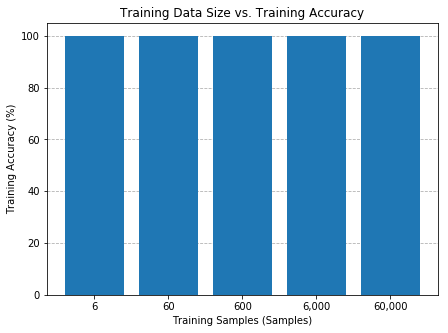

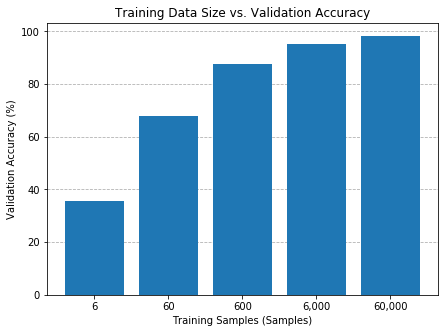

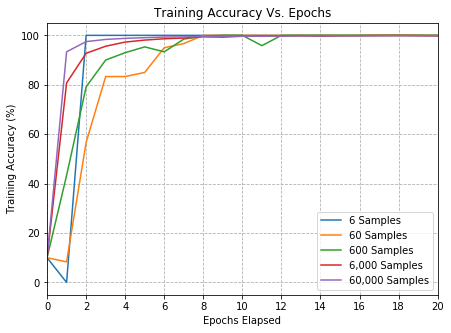

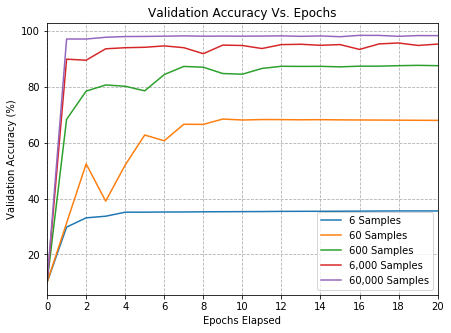

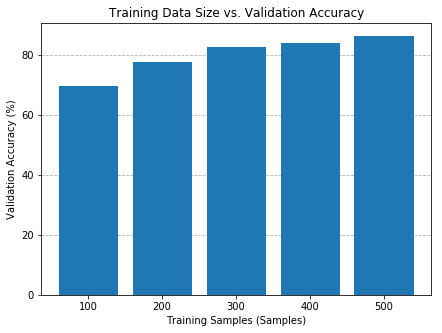

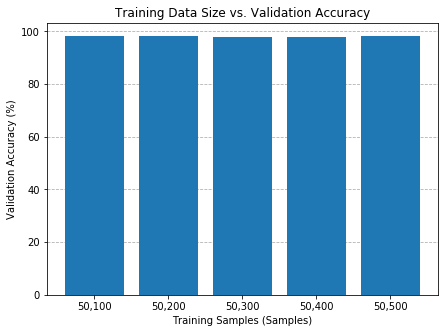

In [22]:
log10_labels = ('6', '60', '600', '6,000', '60,000')
linear_labels_low = ('100', '200', '300', '400', '500')
linear_labels_high = ('50,100', '50,200', '50,300', '50,400', '50,500')

plt.rc('axes', axisbelow=True)

# Bar Graphs
plt.figure(num=0, figsize=(7, 5)) # 6.4X4.8
plt.title('Training Data Size vs. Training Accuracy')
plt.ylabel('Training Accuracy (%)')
plt.xlabel('Training Samples (Samples)')
plt.grid(axis='y', linestyle='dashed')
bar_titles = log10_labels
accuracy = [history['acc'][-1] for history in log10_histories]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')
plt.xticks(x_nums, bar_titles)

plt.figure(num=1, figsize=(7, 5)) # 6.4X4.8
plt.title('Training Data Size vs. Validation Accuracy')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Training Samples (Samples)')
plt.grid(axis='y', linestyle='dashed')
bar_titles = log10_labels
accuracy = [history['val_acc'][-1] for history in log10_histories]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')
plt.xticks(x_nums, bar_titles)

# Line graphs
x_data = np.arange(0, epochs+1)

plt.figure(num=2, figsize=(7, 5)) # 6.4X4.8
plt.title("Training Accuracy Vs. Epochs")
plt.ylabel('Training Accuracy (%)')
plt.xlabel('Epochs Elapsed')
plt.grid(linestyle='dashed')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, epochs+1, step=2.0))
for history in log10_histories:
    plt.plot(x_data, history['acc'])
plt.legend([num + " Samples" for num in log10_labels], loc='lower right')

plt.figure(num=3, figsize=(7, 5)) # 6.4X4.8
plt.title("Validation Accuracy Vs. Epochs")
plt.ylabel('Validation Accuracy (%)')  
plt.xlabel('Epochs Elapsed')
plt.grid(linestyle='dashed')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, epochs+1, step=2.0))
for history in log10_histories:
    plt.plot(x_data, history['val_acc']) 
plt.legend([num + " Samples" for num in log10_labels], loc='lower right')


# Bar graphs for linear x scale
# Linear graph for low values
plt.figure(num=4, figsize=(7, 5)) # 6.4X4.8
plt.title('Training Data Size vs. Validation Accuracy')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Training Samples (Samples)')
plt.grid(axis='y', linestyle='dashed')
bar_titles = linear_labels_low
accuracy = [history['val_acc'][-1] for history in linear_histories_low]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')
plt.xticks(x_nums, bar_titles)
low_slope = (accuracy[-1] - accuracy[0]) / 400.0
print('SLOPE FOR LOW VALUES: {}'.format(low_slope)) 
           
# Linear graph for high values
plt.figure(num=5, figsize=(7, 5)) # 6.4X4.8
plt.title('Training Data Size vs. Validation Accuracy')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Training Samples (Samples)')
plt.grid(axis='y', linestyle='dashed')
bar_titles = linear_labels_high
accuracy = [history['val_acc'][-1] for history in linear_histories_high]
x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center')
plt.xticks(x_nums, bar_titles)
high_slope = (accuracy[-1] - accuracy[0]) / 400.0
print('SLOPE FOR HIGH VALUES: {}'.format(high_slope)) 
       